In [189]:
#IT.NET.USER.P2
#Niveau d'anglais
#pop croissante
#Niveau de pauvreté
#internet

#feature 
#créer artificiellement des indicateurs par exemple 2015-2010 et voir les évolutions
#faire des courbe 
#corr entre indicateurs 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt,mpld3

data = pd.read_csv('ToAnalyze.csv')
df_data = data.copy().drop(['nb_nan','Unnamed: 0'],axis = 1)
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050
0,Belgium,BEL,"Enrolment in secondary general, both sexes (number)",SE.SEC.ENRL.GC,476694.000000,481952.000000,486581.000000,487407.000000,479769.000000,485087.000000,...,668179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,BEL,GDP per capita (current US$),NY.GDP.PCAP.CD,23207.405911,23121.601144,25052.339390,30743.902538,35589.689117,36967.259184,...,40375.388639,41236.266589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Belgium,BEL,Internet users (per 100 people),IT.NET.USER.P2,29.431692,31.288396,46.330000,49.970000,53.860000,55.820000,...,85.052900,86.516500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Belgium,BEL,Population growth (annual %),SP.POP.GROW,0.242518,0.343951,0.448269,0.418642,0.432788,0.550056,...,0.579446,0.653895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,BEL,"Population of the official age for secondary education, both sexes (number)",SP.SEC.TOTL.IN,730975.000000,731712.000000,737409.000000,742214.000000,746668.000000,751737.000000,...,730126.000000,728650.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
pd.set_option("max_colwidth", None)
df_series = pd.read_csv('edseries.csv').drop(['Unnamed: 0','Short definition','Topic'],axis = 1)
kpi = df_series['Indicator Code'].values



In [191]:
from sklearn.preprocessing import MinMaxScaler
std = []
groupe = []
i=0
for el in kpi:
    df2 = df_data[df_data['Indicator Code']==el].drop(["Country Code","Indicator Name", "Indicator Code"],axis = 1).dropna(axis = 1)
    df2.iloc[:,1:] = scaler.fit_transform(df2.iloc[:,1:])
    groupe.append((df2.std().mean(),el))
    std.append(df2.std().mean())



### Regardons les indicateurs qui discrimine au mieux les différents pays grace à l'ecart-type

<BarContainer object of 11 artists>

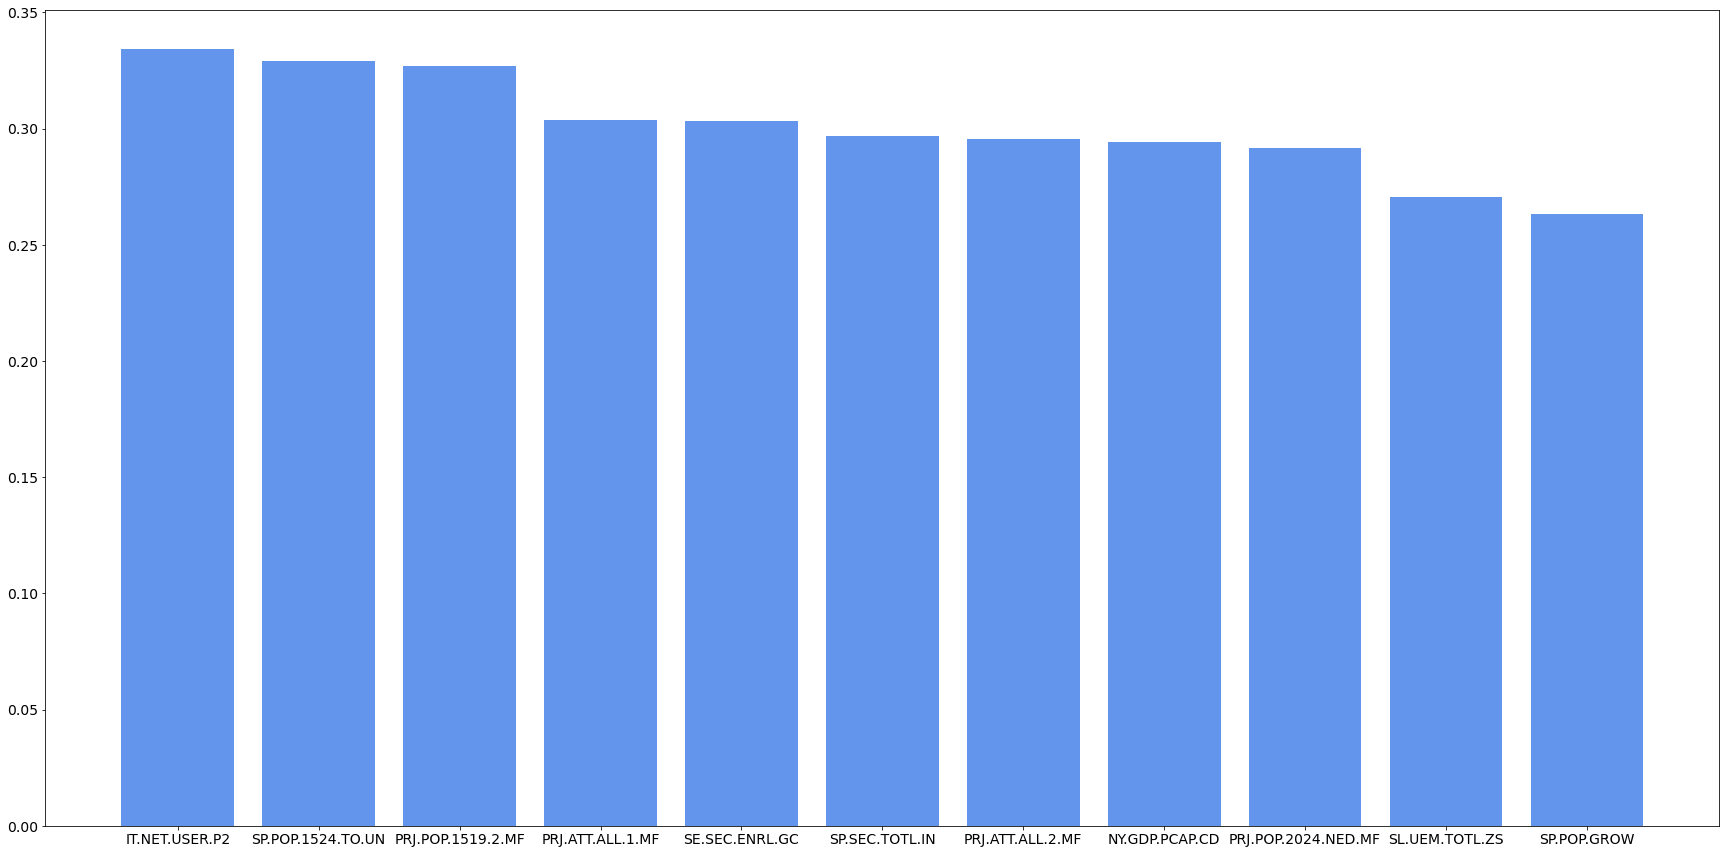

In [199]:
std = np.sort(std)[::-1]
groupe = ['SP.POP.GROW','SL.UEM.TOTL.ZS','PRJ.POP.2024.NED.MF','NY.GDP.PCAP.CD','PRJ.ATT.ALL.2.MF','SP.SEC.TOTL.IN',
 'SE.SEC.ENRL.GC','PRJ.ATT.ALL.1.MF','PRJ.POP.1519.2.MF','SP.POP.1524.TO.UN','IT.NET.USER.P2']
groupe = groupe[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(30,15))
plt.bar(groupe,std,color = 'cornflowerblue')

In [197]:
def graphique(df,ind):
    df = df_data[df_data['Indicator Code']==ind].dropna(axis=1)
    axisX = df.columns[4:]
    plt.figure(figsize=(30,15))
    for el in df['Country Name'].values:
        plt.plot(axisX,df[df['Country Name'] == el].values[0][4:],linewidth=3, label=el)
        plt.scatter(axisX,df[df['Country Name'] == el].values[0][4:])
    plt.plot(axisX,df.mean().values, color = 'b',linewidth=9)
    plt.plot(axisX,df.mean().values, color = 'r',linewidth=6, label ='moyenne')
    plt.xlabel("Année")
    plt.ylabel(ind)
    plt.title(f"Evolution de {ind} en fonction des années")
    plt.rcParams.update({'font.size': 18})
    plt.legend()
    plt.rcParams.update({'font.size': 24})
    plt.grid()
    plt.show()
    
#indicateur voir lesquels sont pertinent (Alphabétisation par exemple)

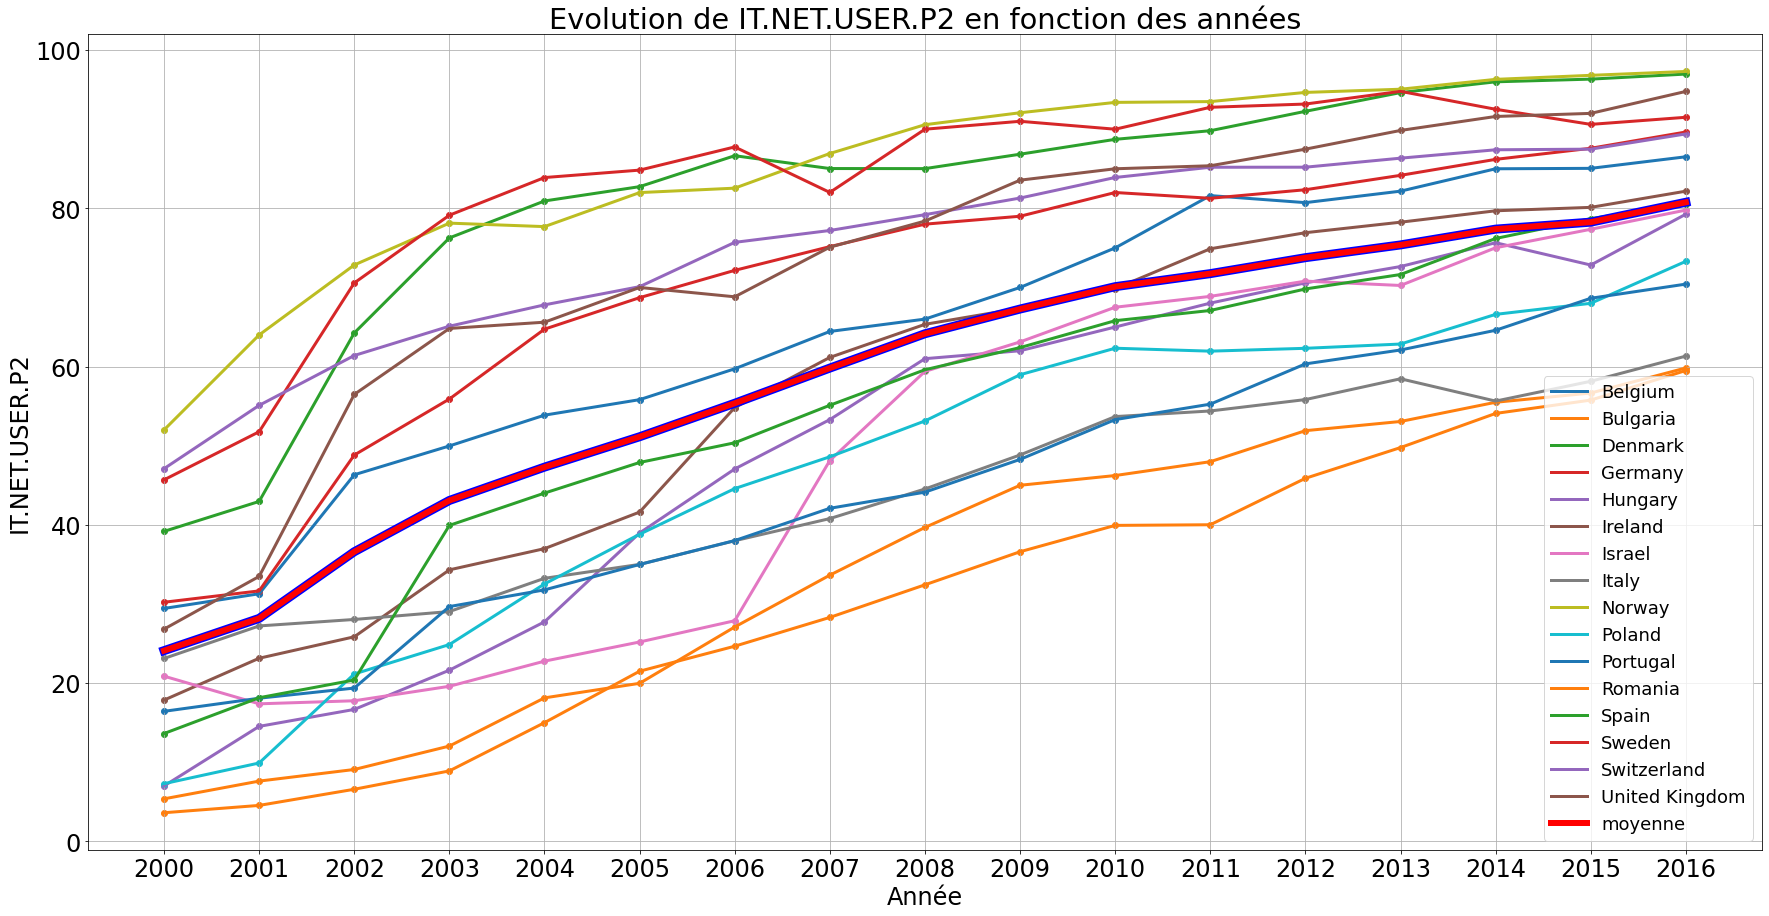

bonjour


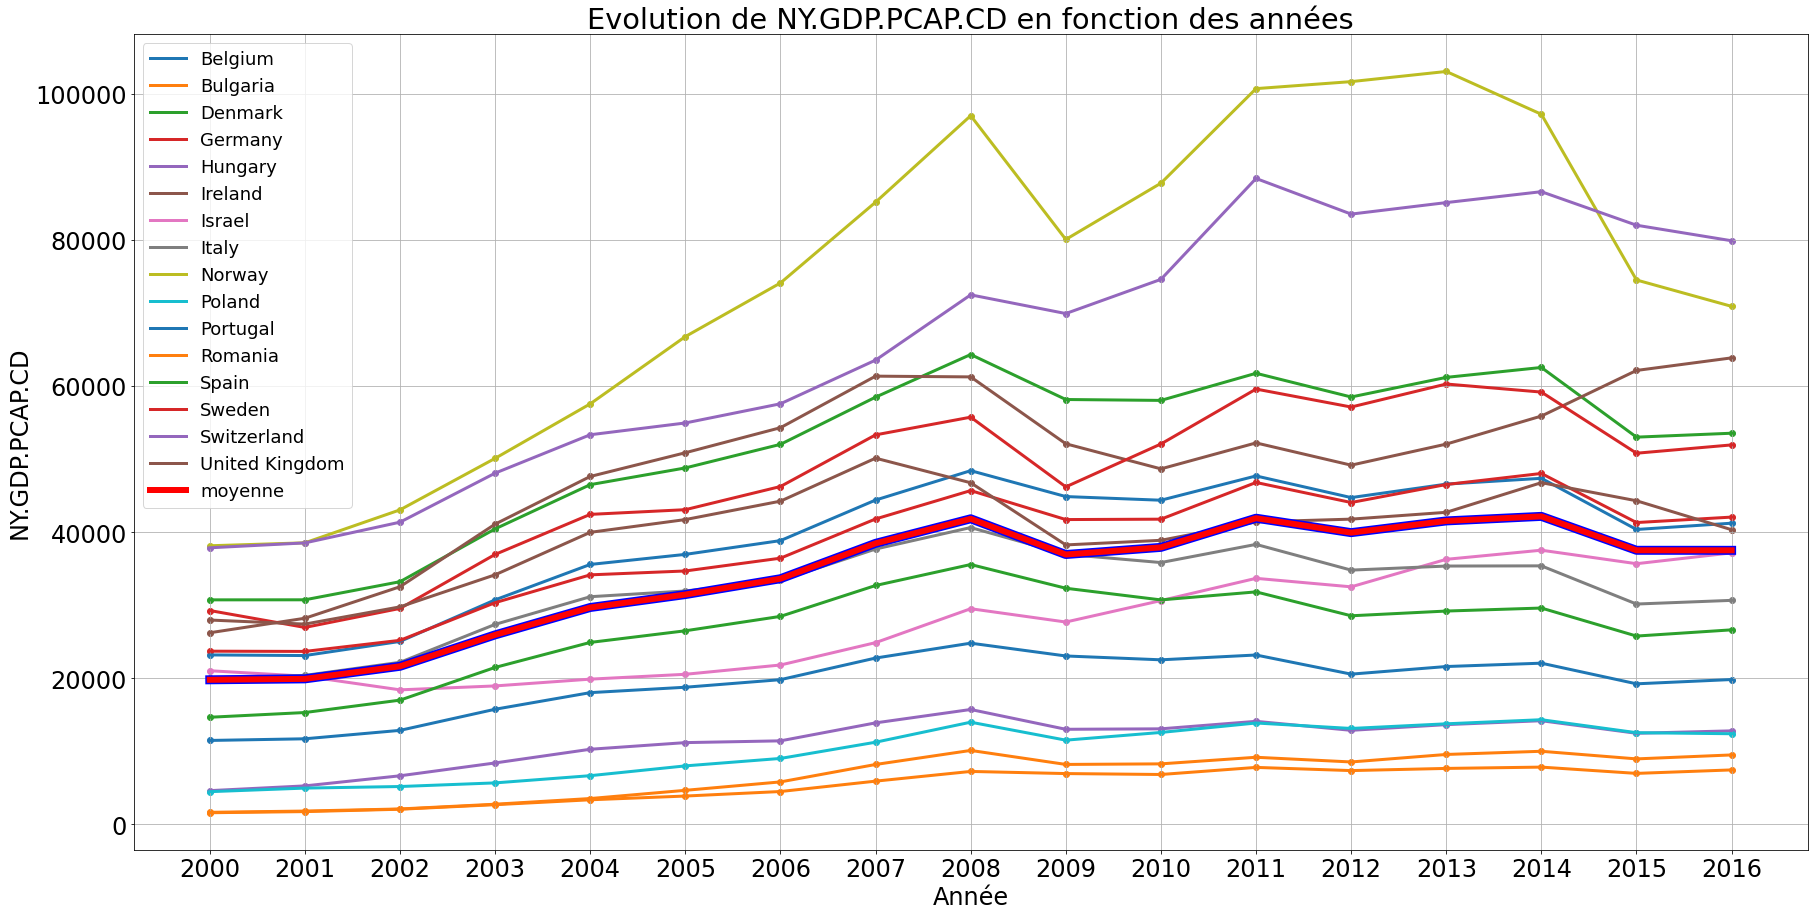

bonjour


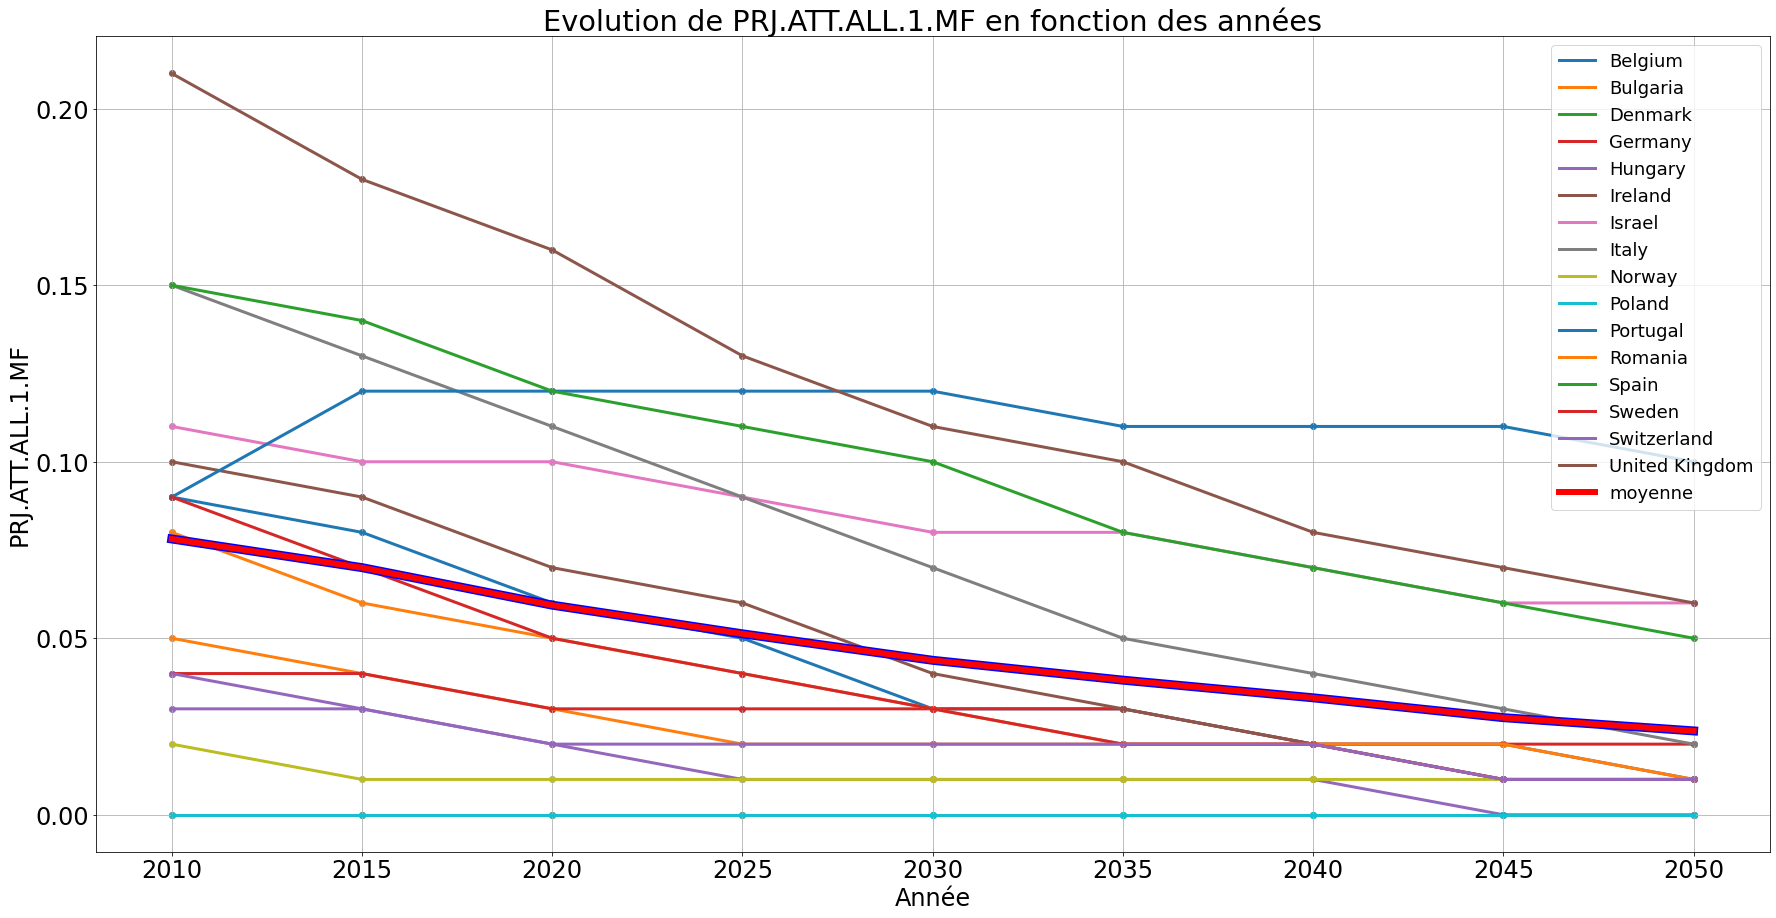

bonjour


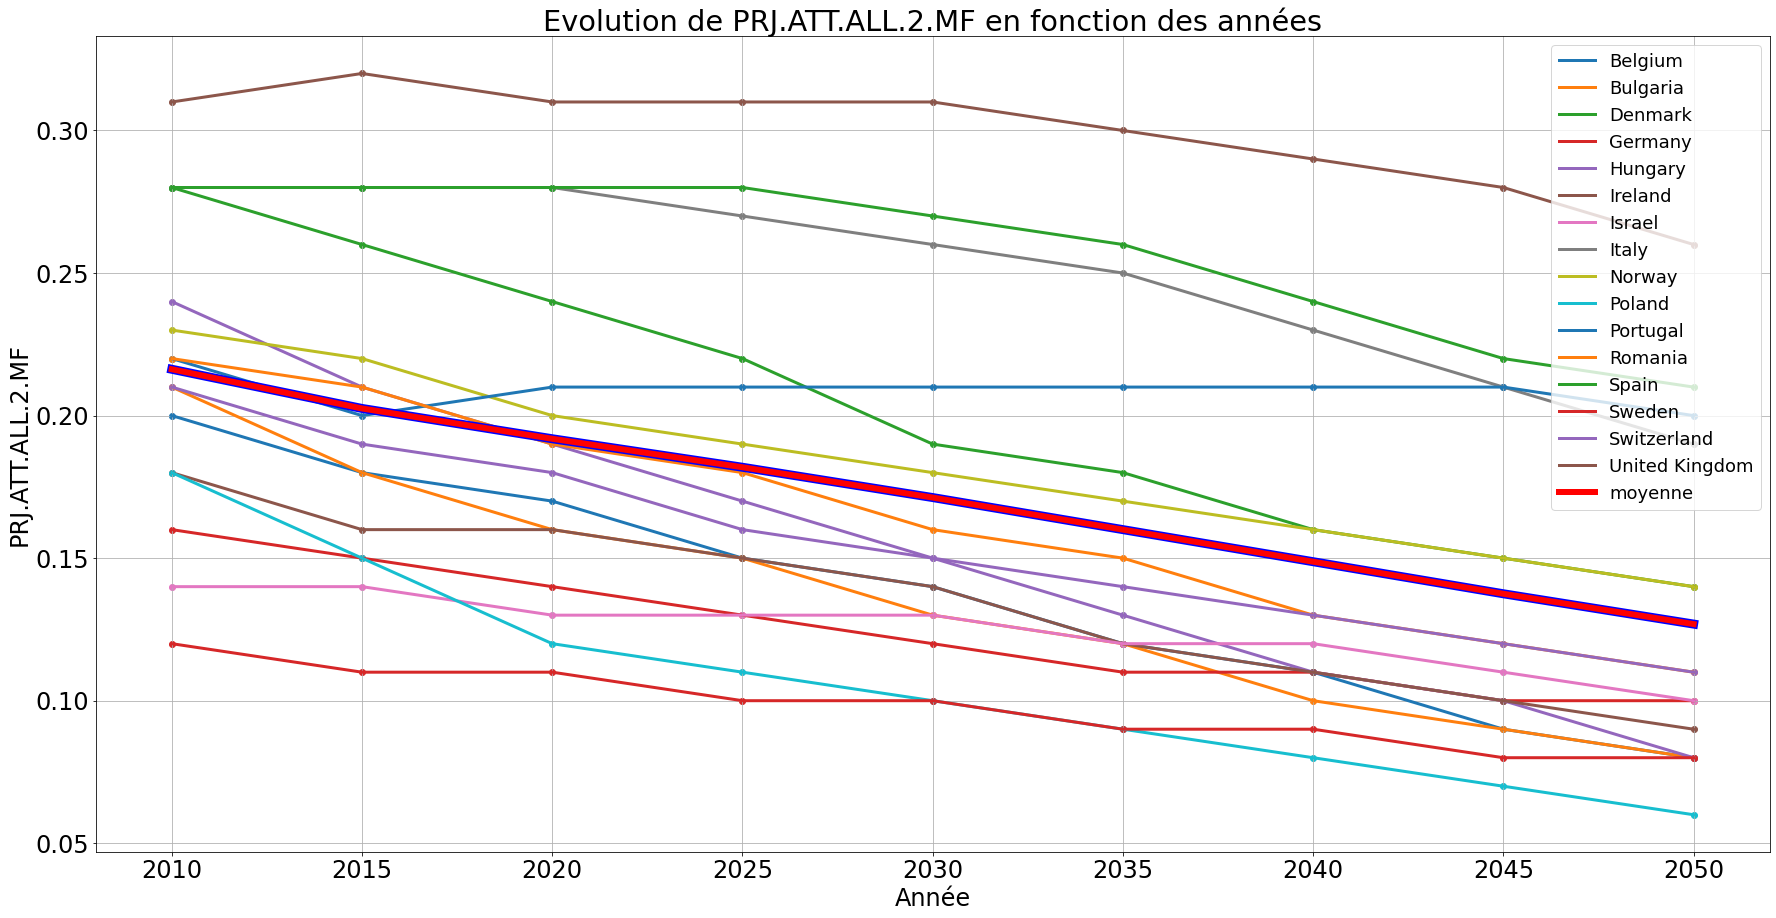

bonjour


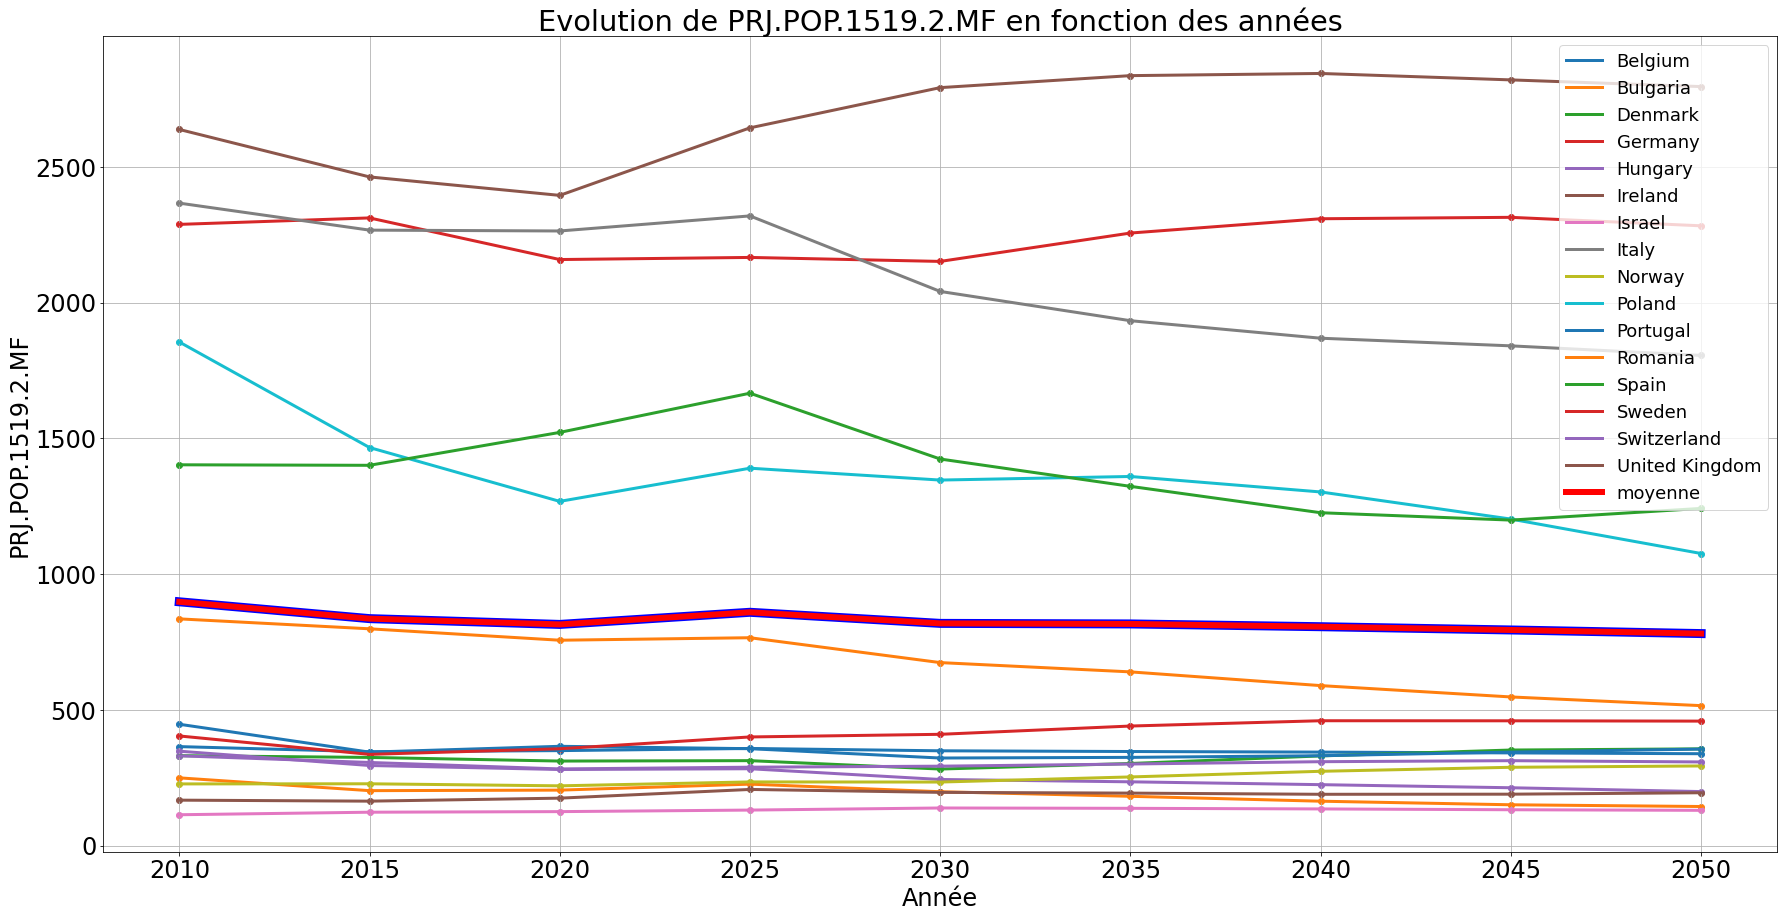

bonjour


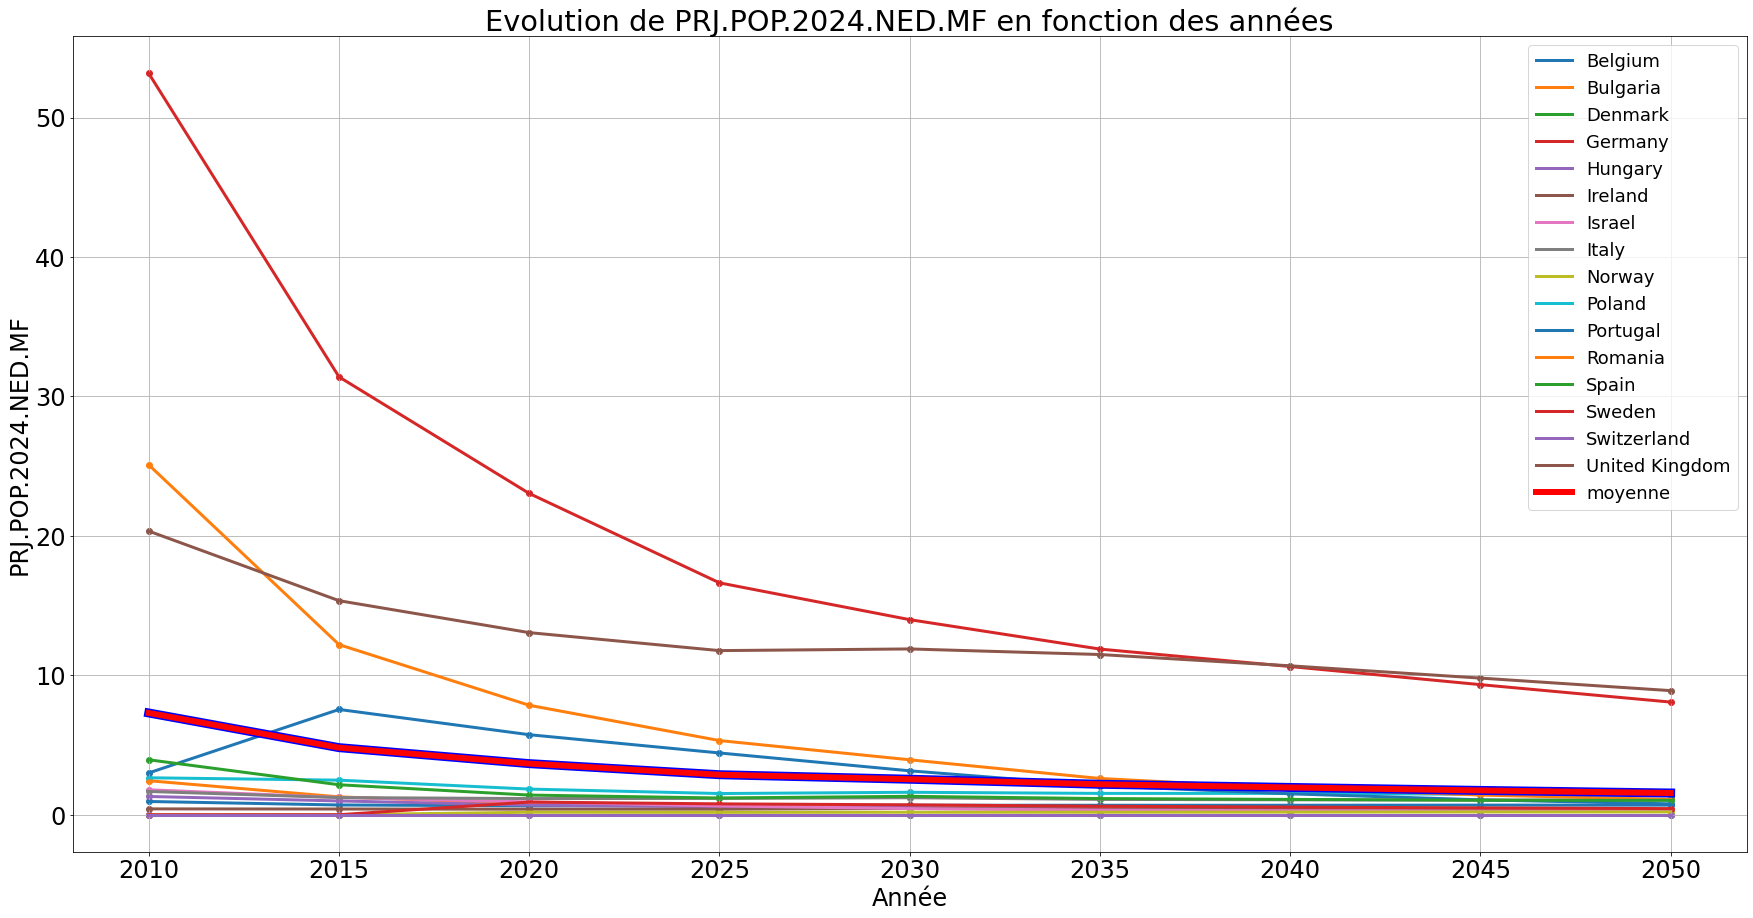

bonjour


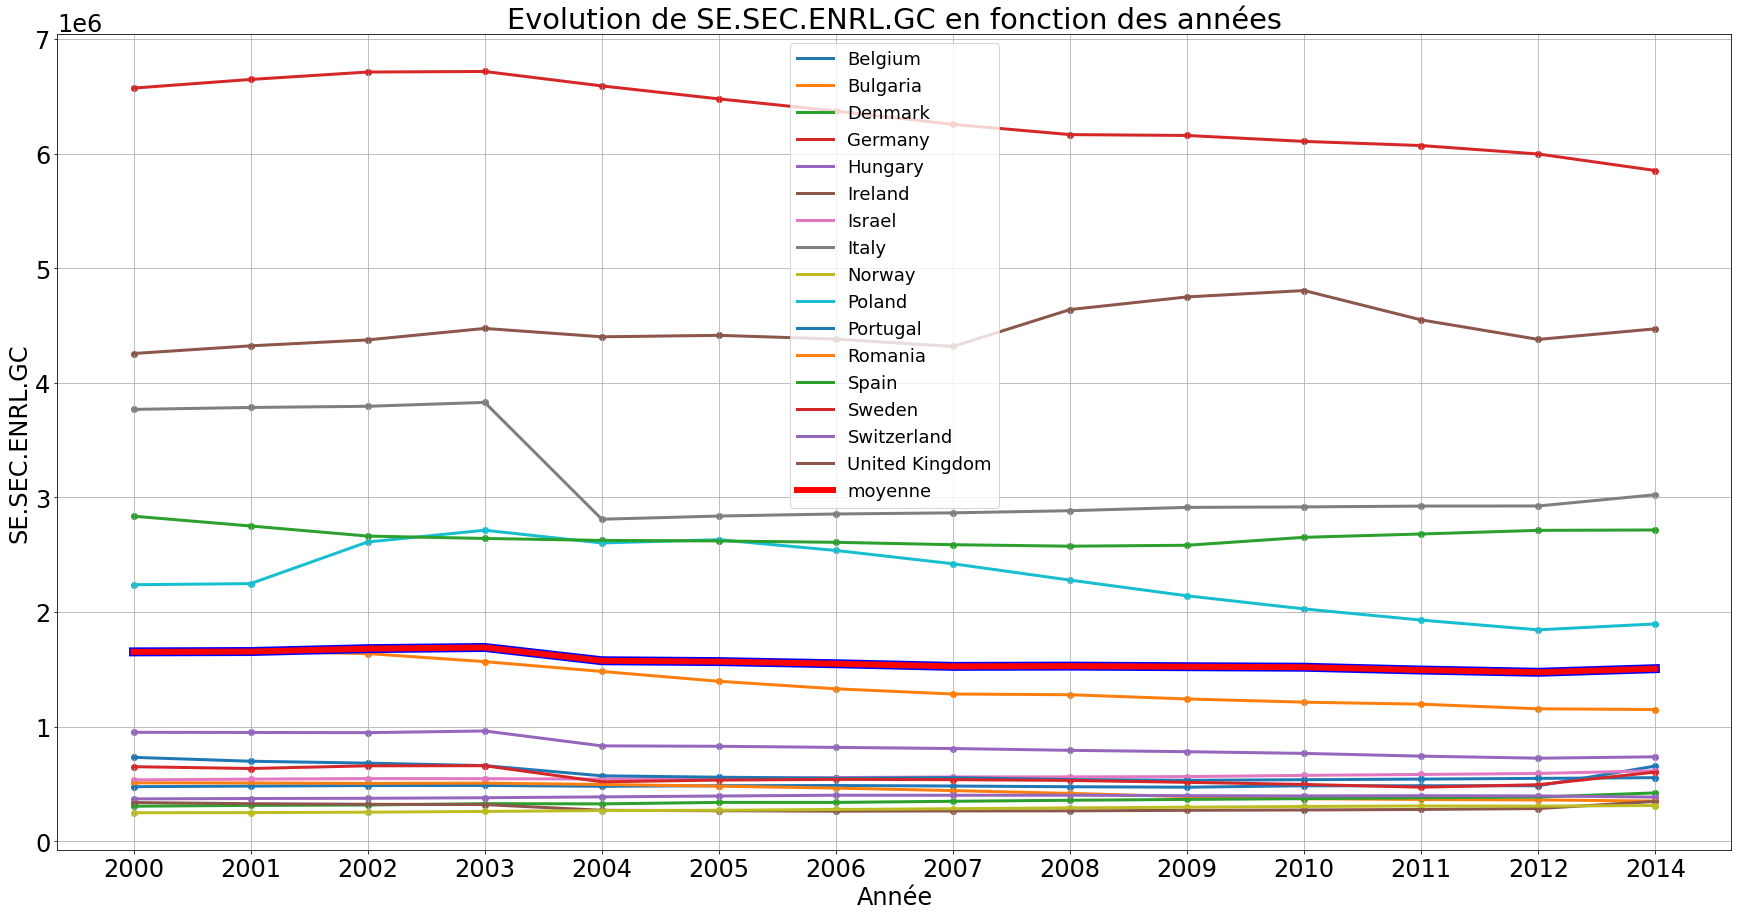

bonjour


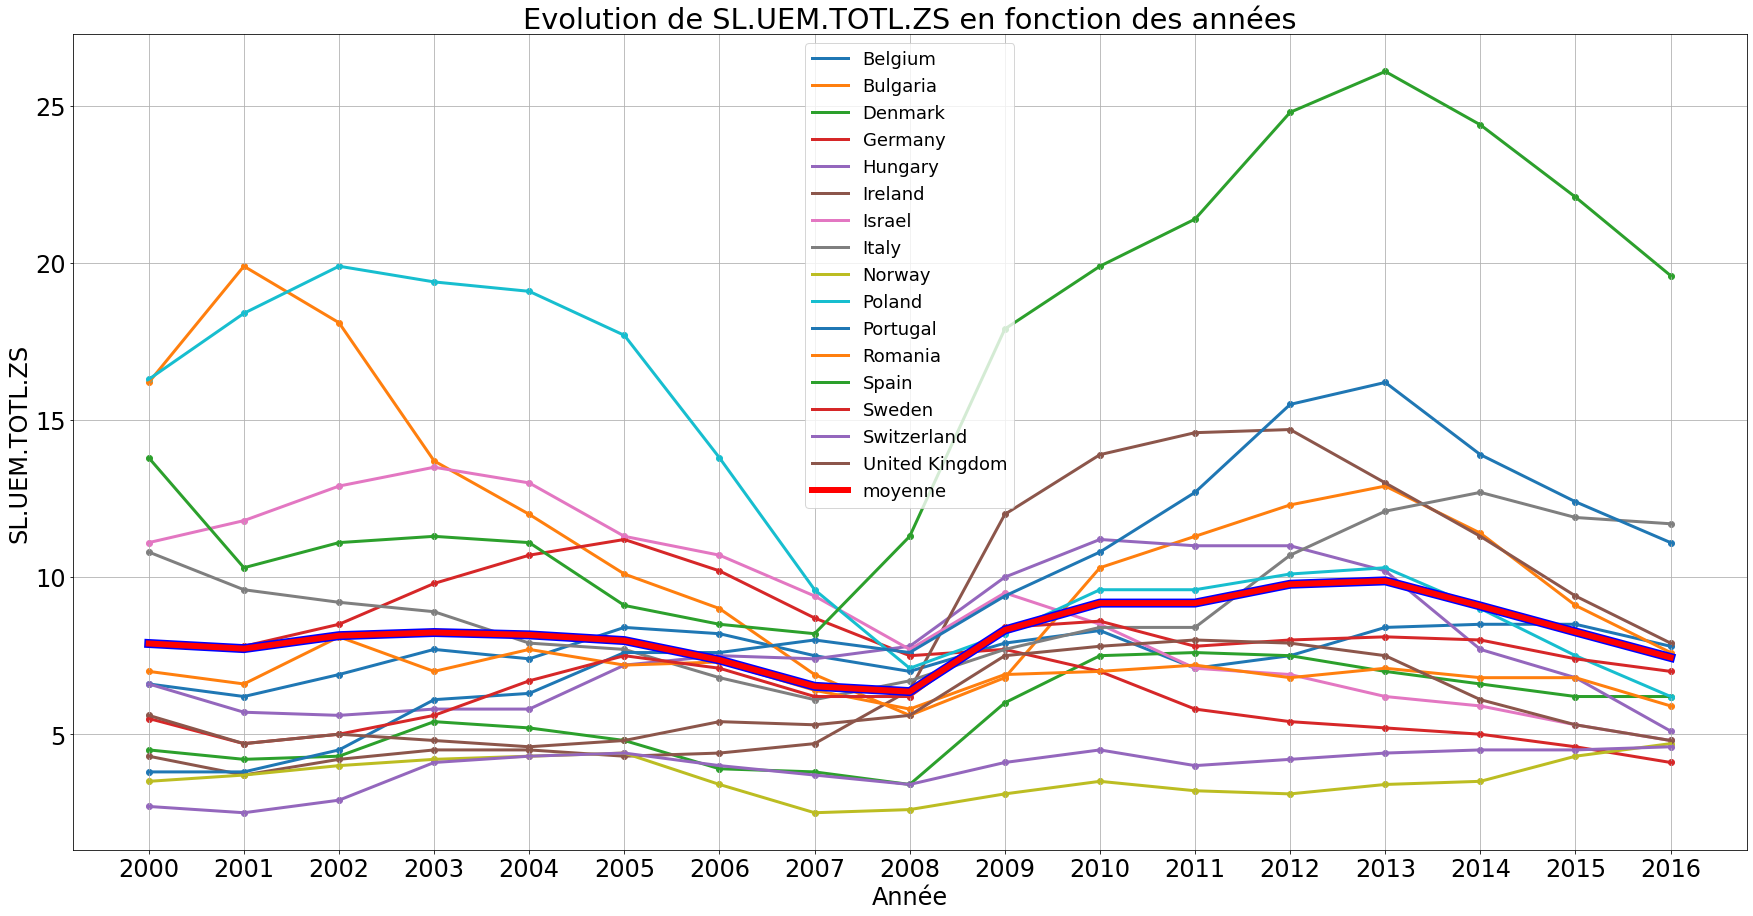

bonjour


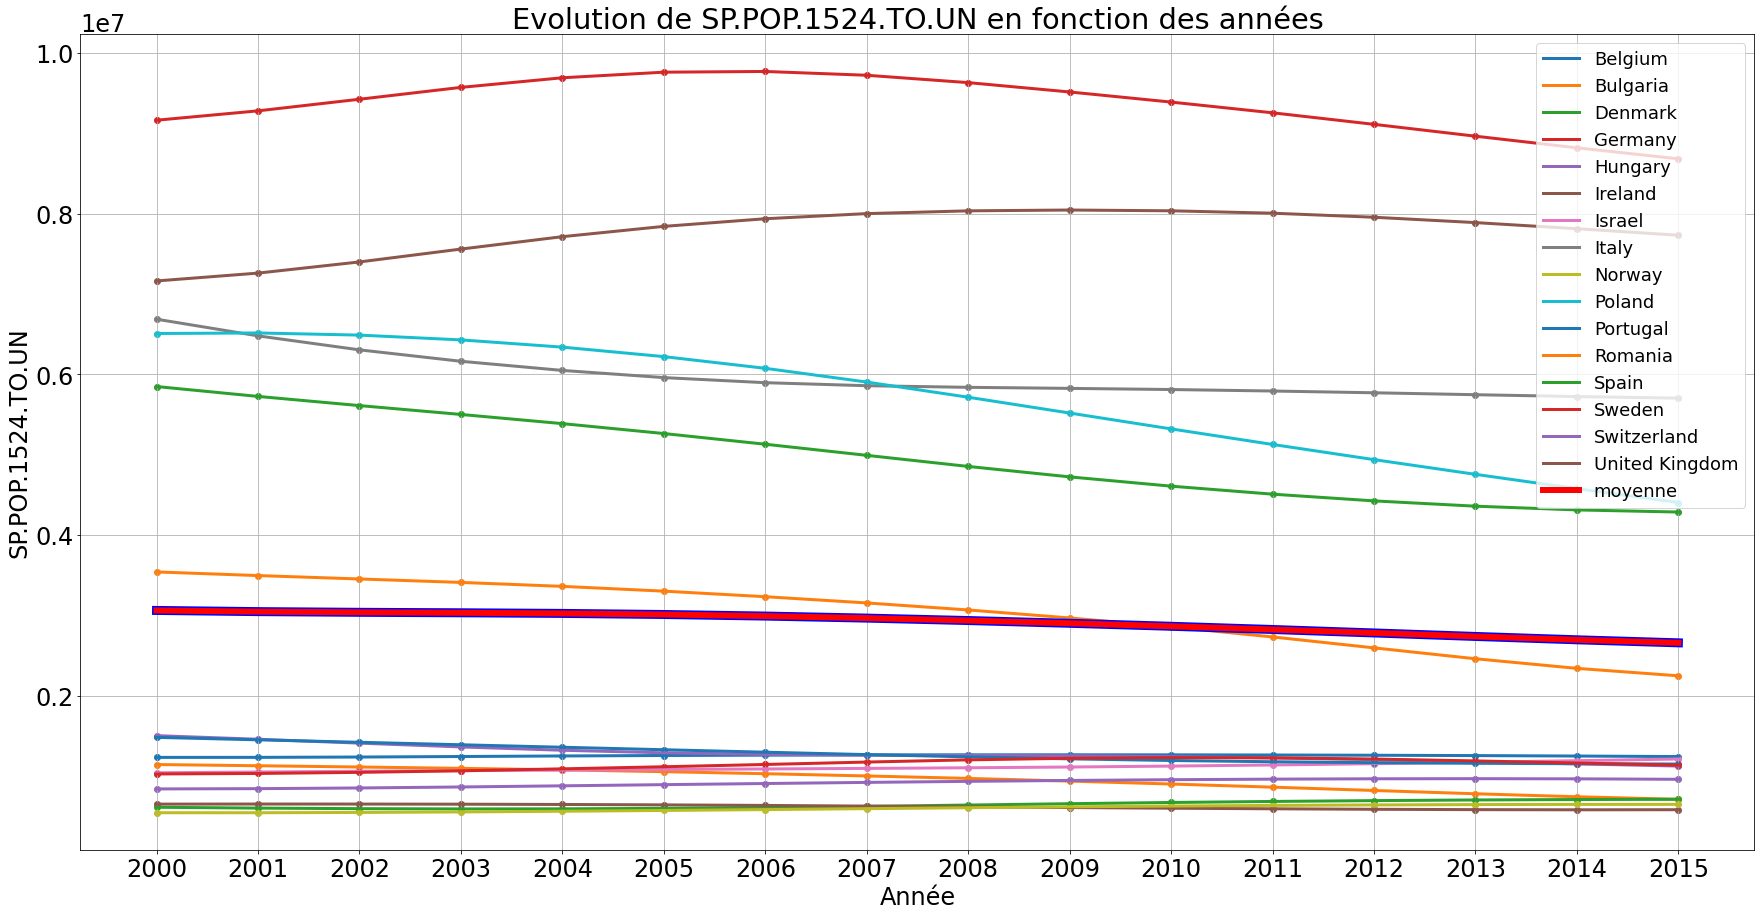

bonjour


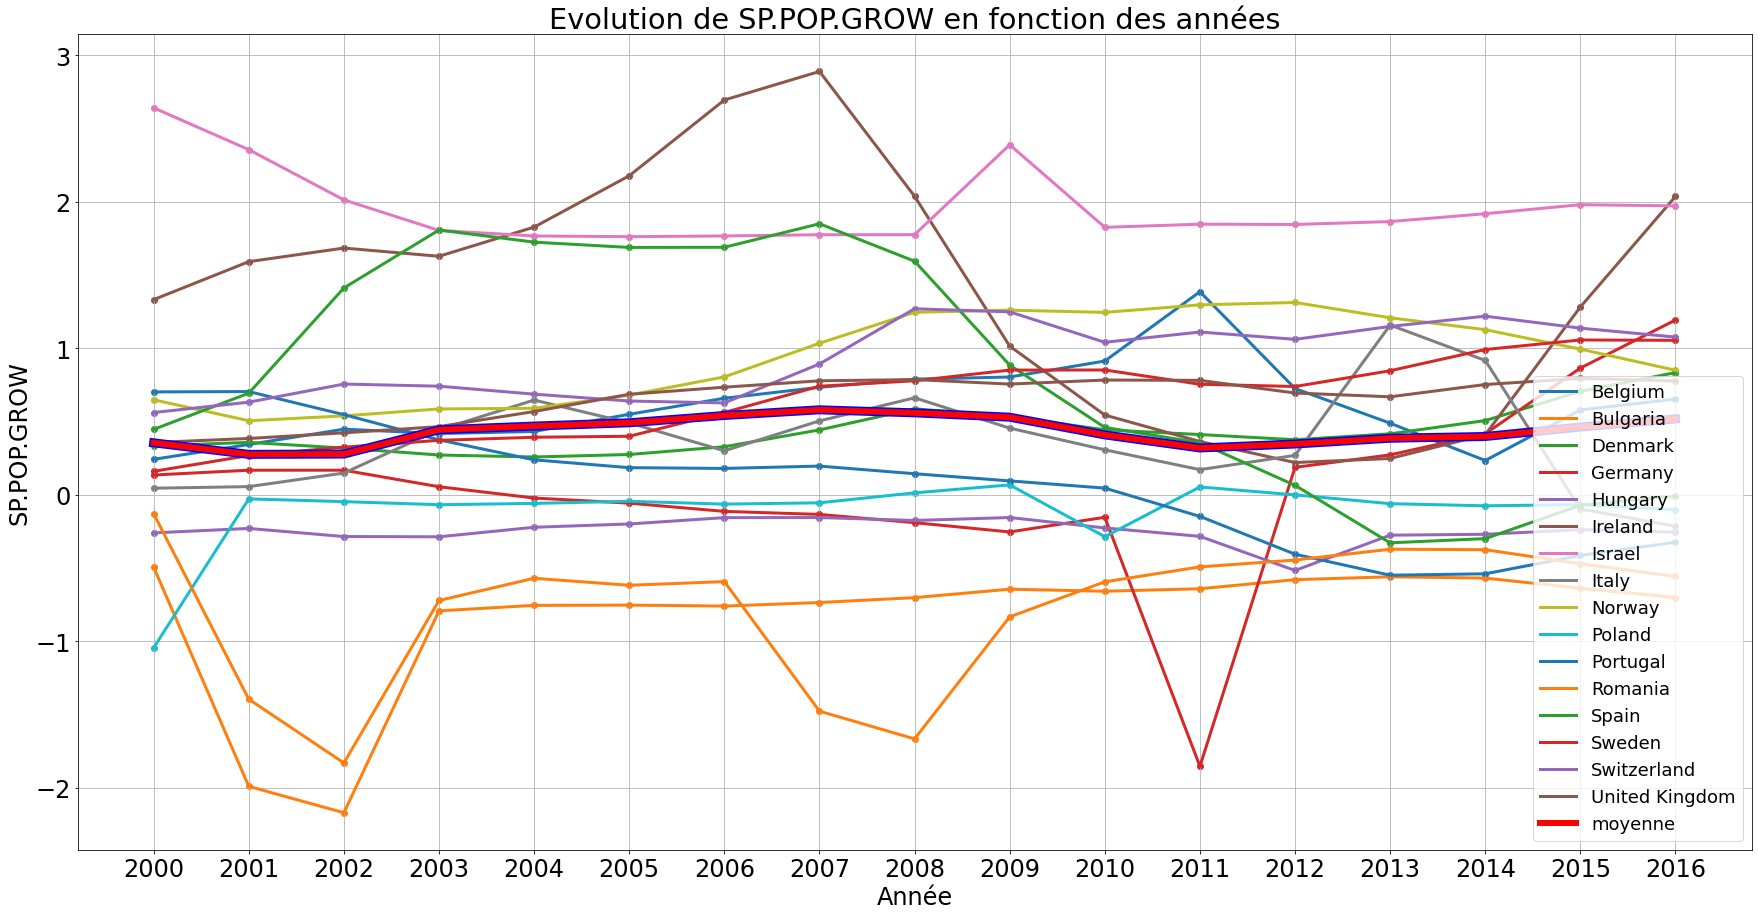

bonjour


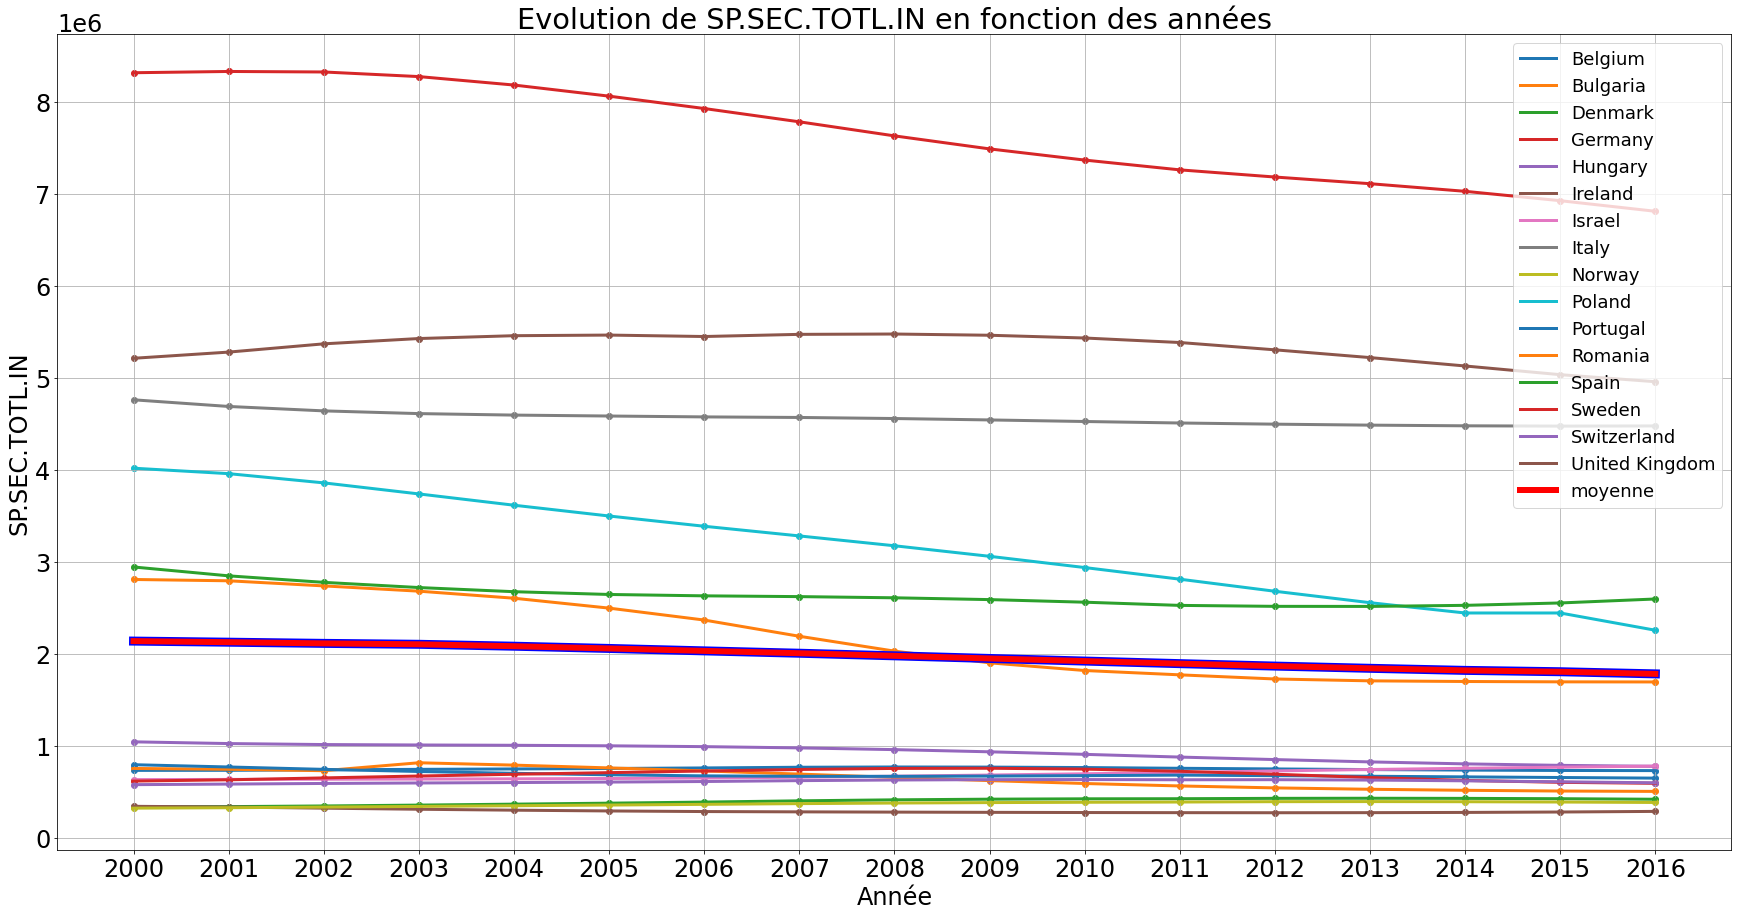

bonjour


In [194]:
for el in kpi:
    df_IT = df_data[df_data['Indicator Code']==el]
    graphique(df_IT,el)

In [205]:
df_data_feature = df_data
df_data_feature["2015-2010"] = (df_data_feature["2015"] - df_data_feature["2010"])/5

In [206]:
df_data_feature

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2016,2017,2020,2025,2030,2035,2040,2045,2050,2015-2010
0,Belgium,BEL,"Enrolment in secondary general, both sexes (number)",SE.SEC.ENRL.GC,476694.000000,481952.000000,486581.000000,487407.000000,479769.000000,485087.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36762.200000
1,Belgium,BEL,GDP per capita (current US$),NY.GDP.PCAP.CD,23207.405911,23121.601144,25052.339390,30743.902538,35589.689117,36967.259184,...,41236.266589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-800.957599
2,Belgium,BEL,Internet users (per 100 people),IT.NET.USER.P2,29.431692,31.288396,46.330000,49.970000,53.860000,55.820000,...,86.516500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.010580
3,Belgium,BEL,Population growth (annual %),SP.POP.GROW,0.242518,0.343951,0.448269,0.418642,0.432788,0.550056,...,0.653895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.066839
4,Belgium,BEL,"Population of the official age for secondary education, both sexes (number)",SP.SEC.TOTL.IN,730975.000000,731712.000000,737409.000000,742214.000000,746668.000000,751737.000000,...,728650.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6335.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,United Kingdom,GBR,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,5.600000,4.700000,5.000000,4.800000,4.600000,4.800000,...,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000
172,United Kingdom,GBR,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total,PRJ.ATT.ALL.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.31,0.31,0.31,0.30,0.29,0.28,0.26,0.002000
173,United Kingdom,GBR,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total,PRJ.ATT.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.16,0.13,0.11,0.10,0.08,0.07,0.06,-0.006000
174,United Kingdom,GBR,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total,PRJ.POP.1519.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2394.89,2643.62,2791.76,2835.94,2843.93,2820.25,2795.55,-34.962000
